In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape

(142193, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [7]:
num_to_fill = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 
                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 
                   'Pressure9am', 'Pressure3pm']

for col in num_to_fill:
    df.fillna({col: df[col].mean()}, inplace=True)

In [8]:
cat_to_fill = ['WindGustDir','WindDir9am','WindDir3pm',]

for col in cat_to_fill:
    df.fillna({col: df[col].mode()[0]},inplace=True)

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [10]:
df.drop(columns=['Date','Location','Evaporation','Sunshine','Cloud9am','Cloud3pm','RainToday'],inplace=True)

In [11]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,No


In [12]:
df1 = df.copy()

In [13]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,2.360682
std,6.388924,7.109554,8.423217,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,6.472166,6.870771,8.477969
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,16.800000,21.300000,0.000000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,0.800000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,371.000000


In [14]:
num_data = df1.select_dtypes(exclude='object').columns.values

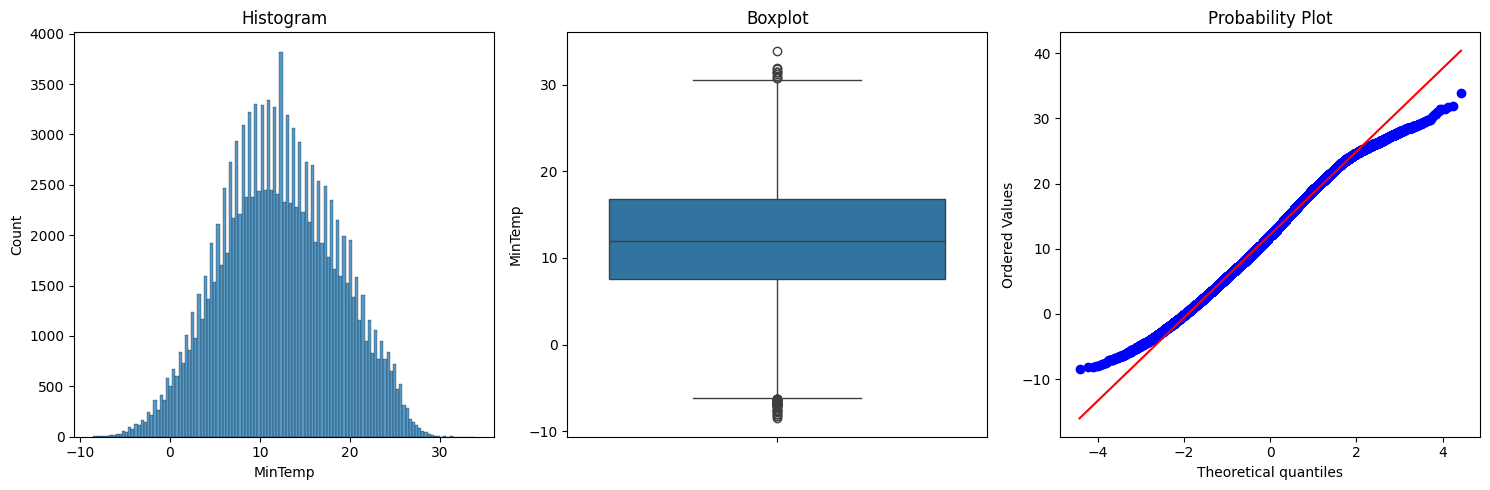

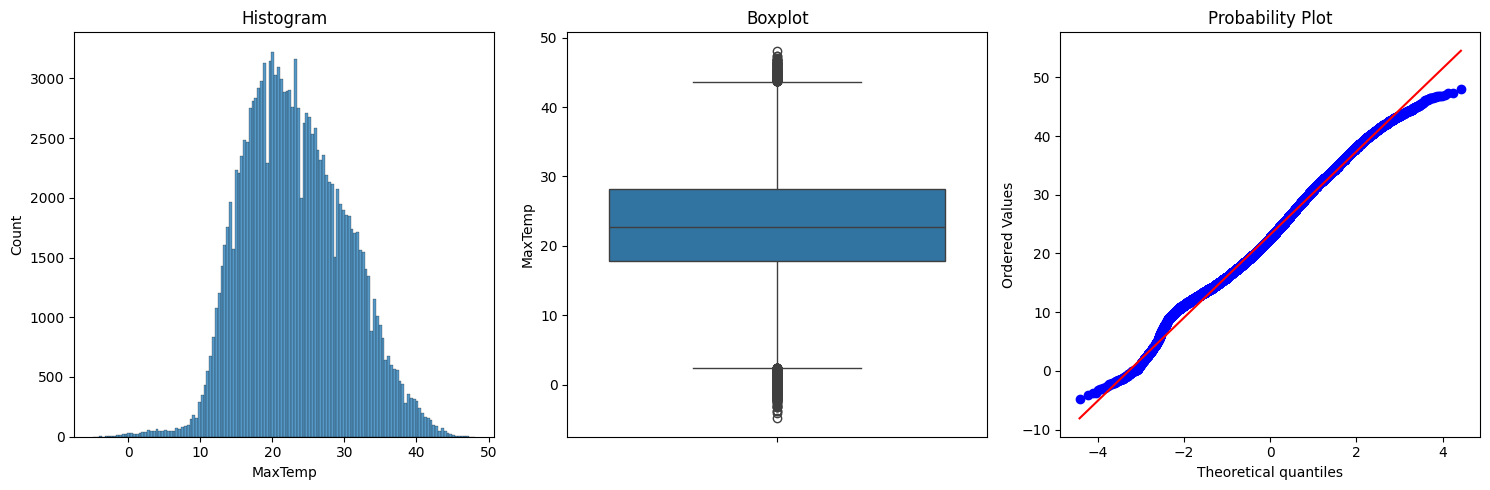

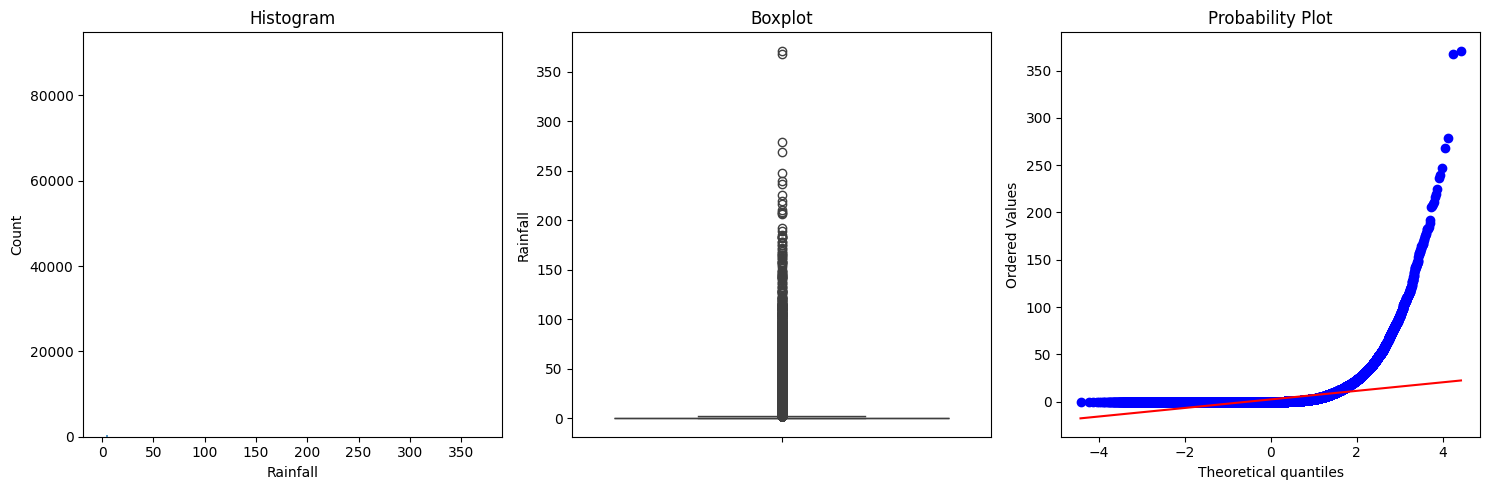

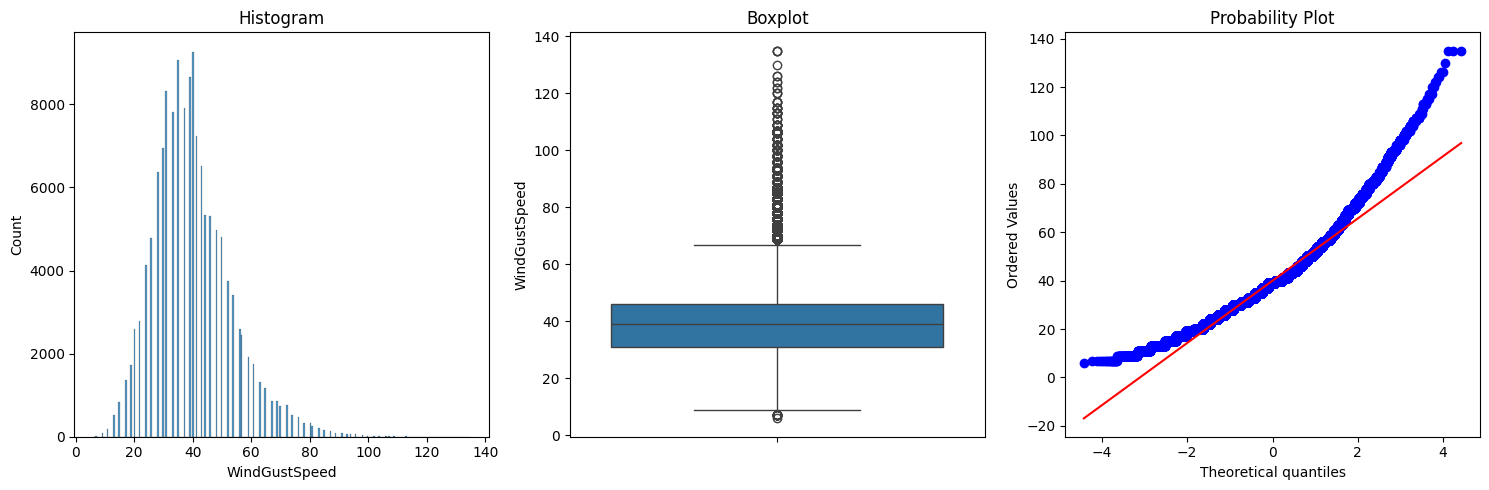

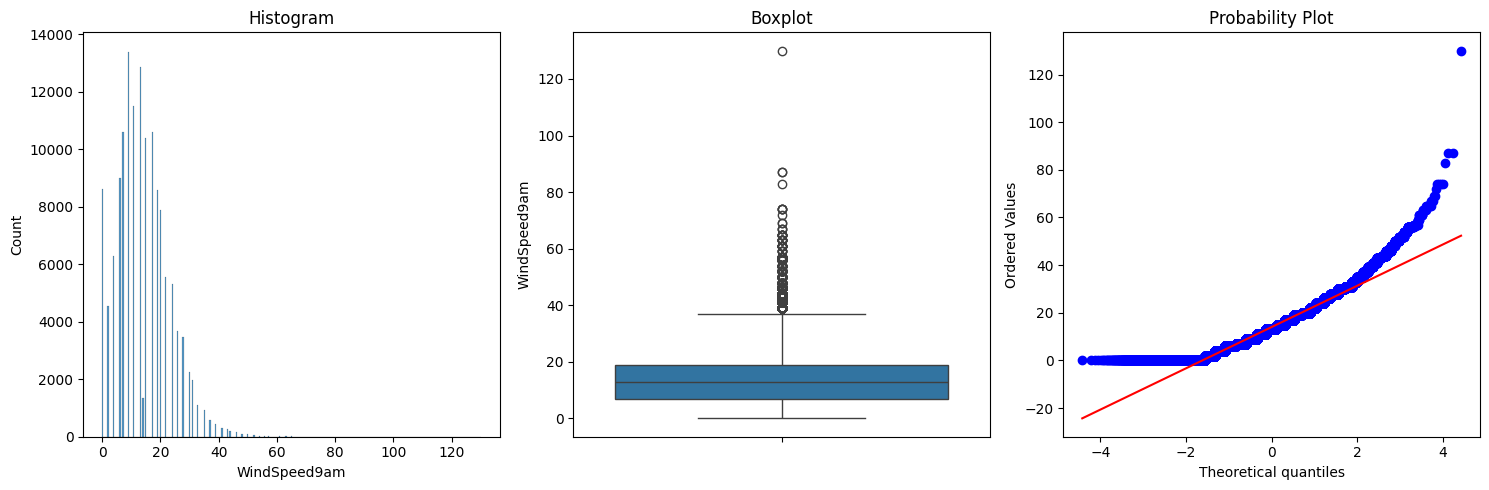

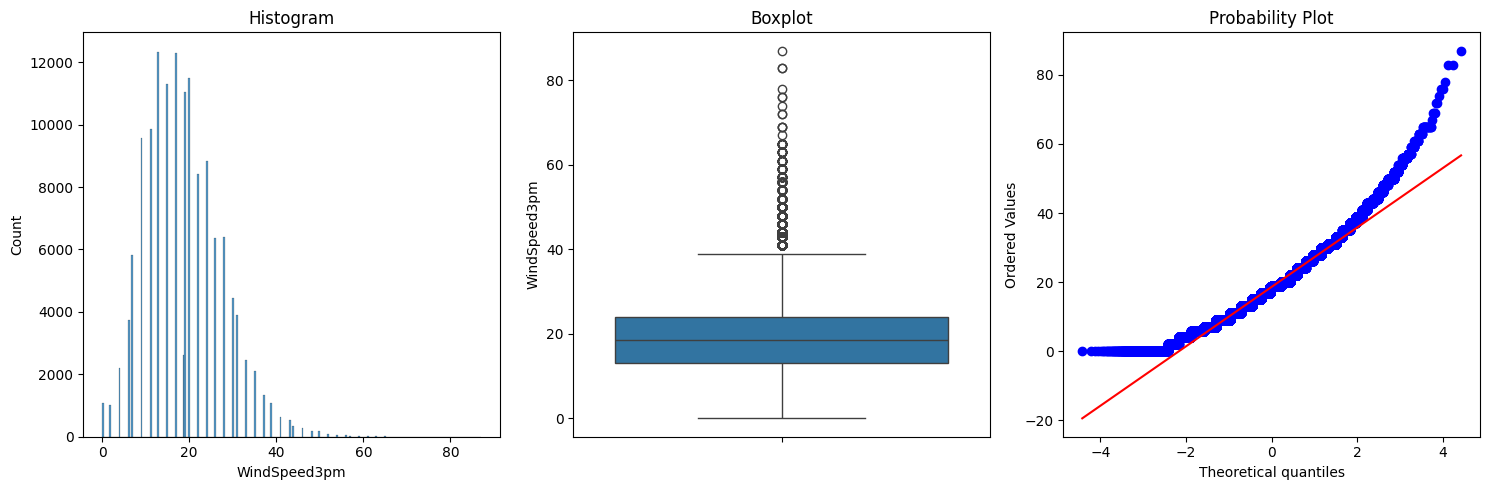

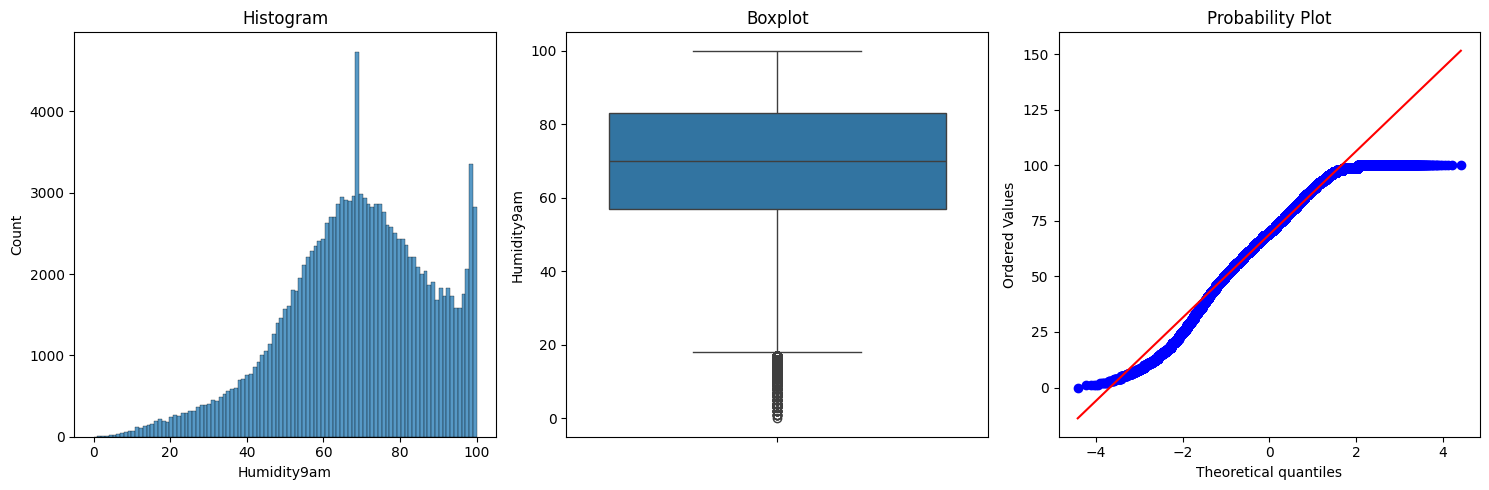

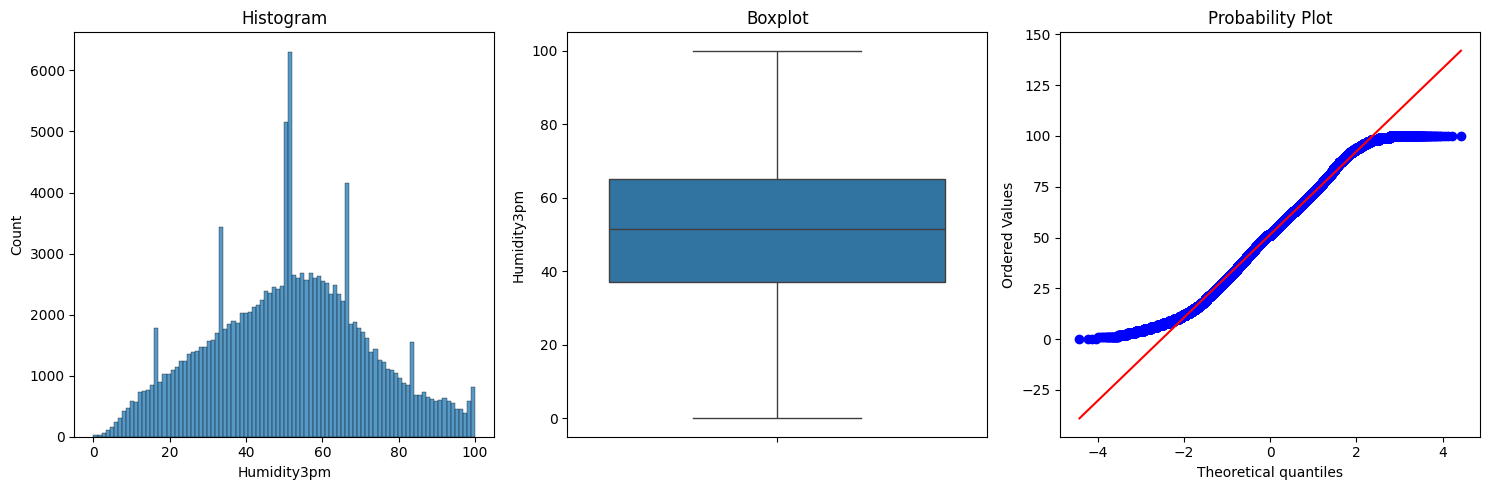

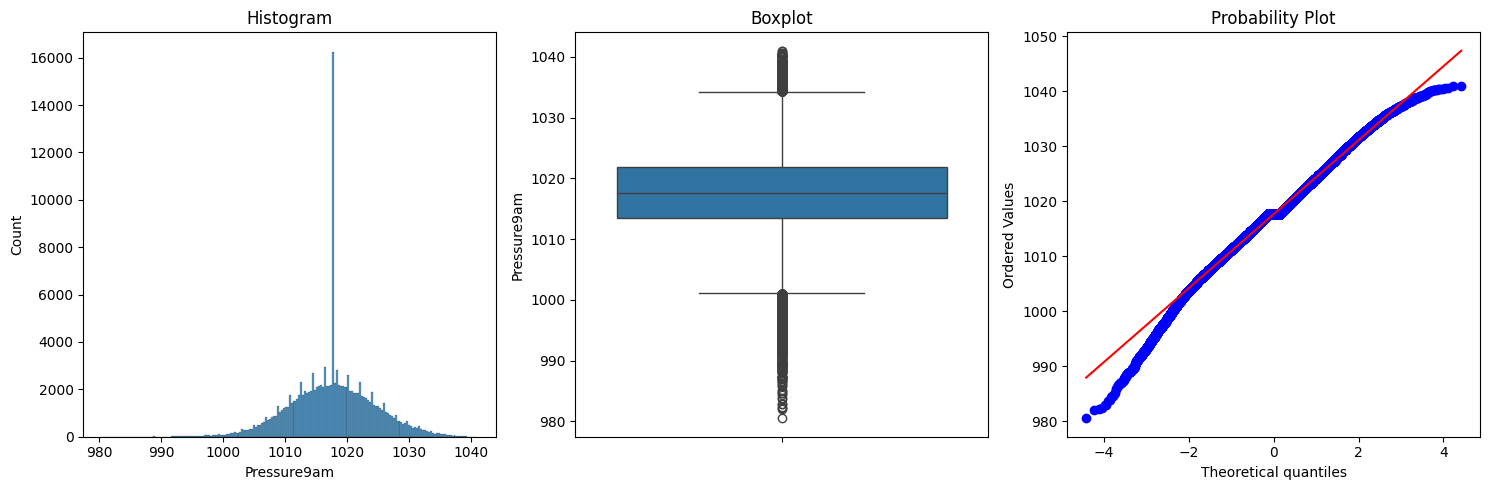

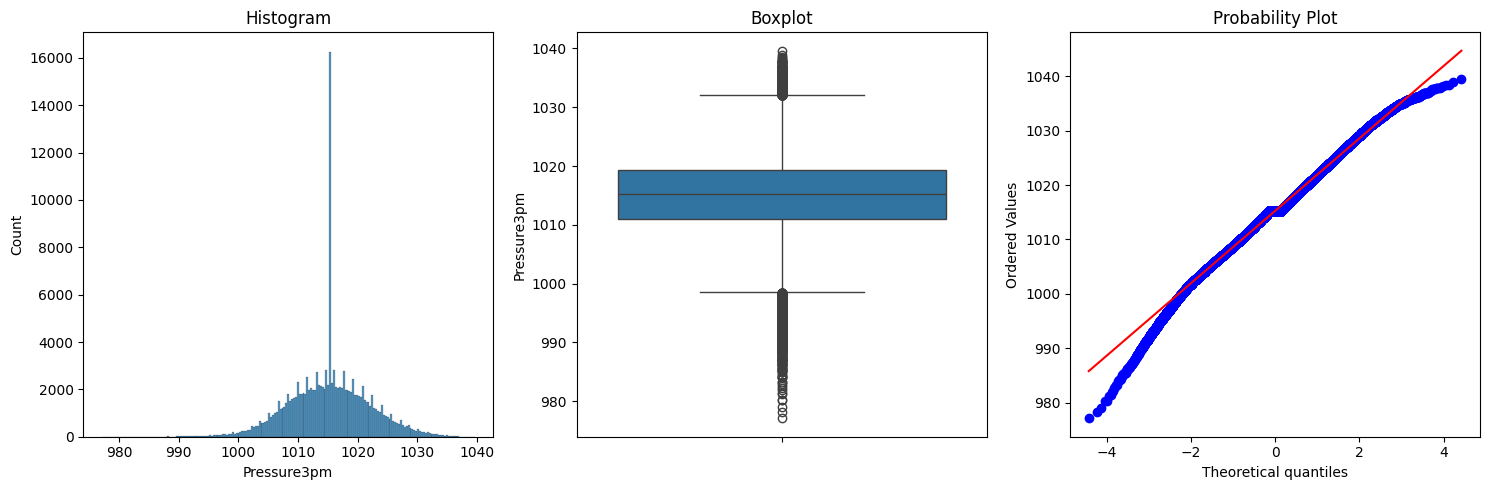

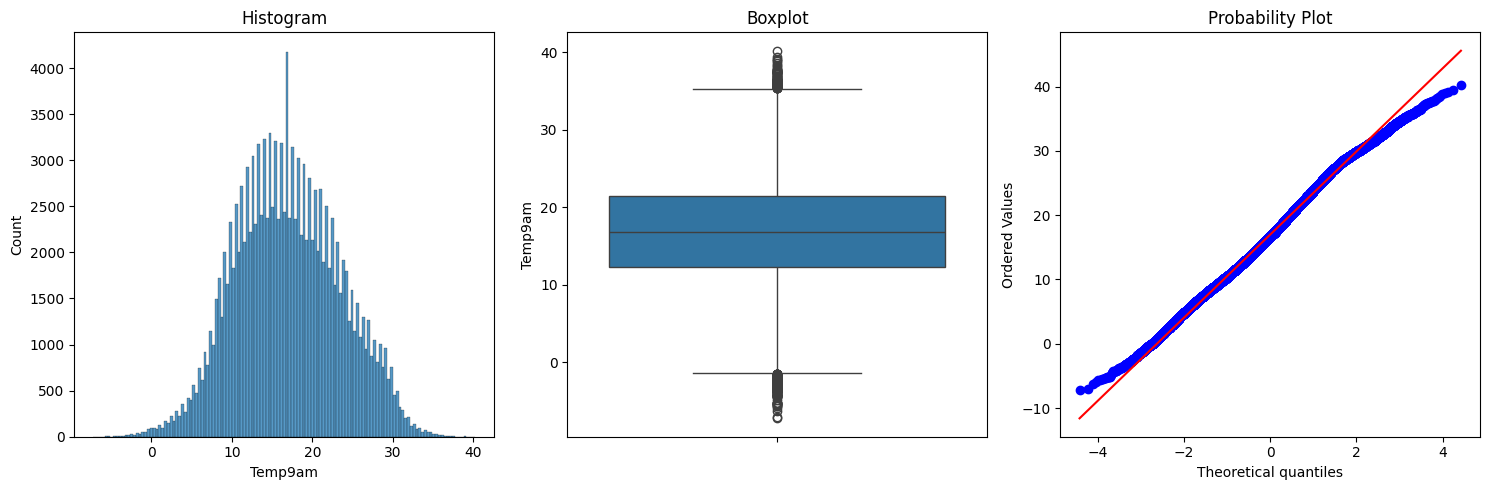

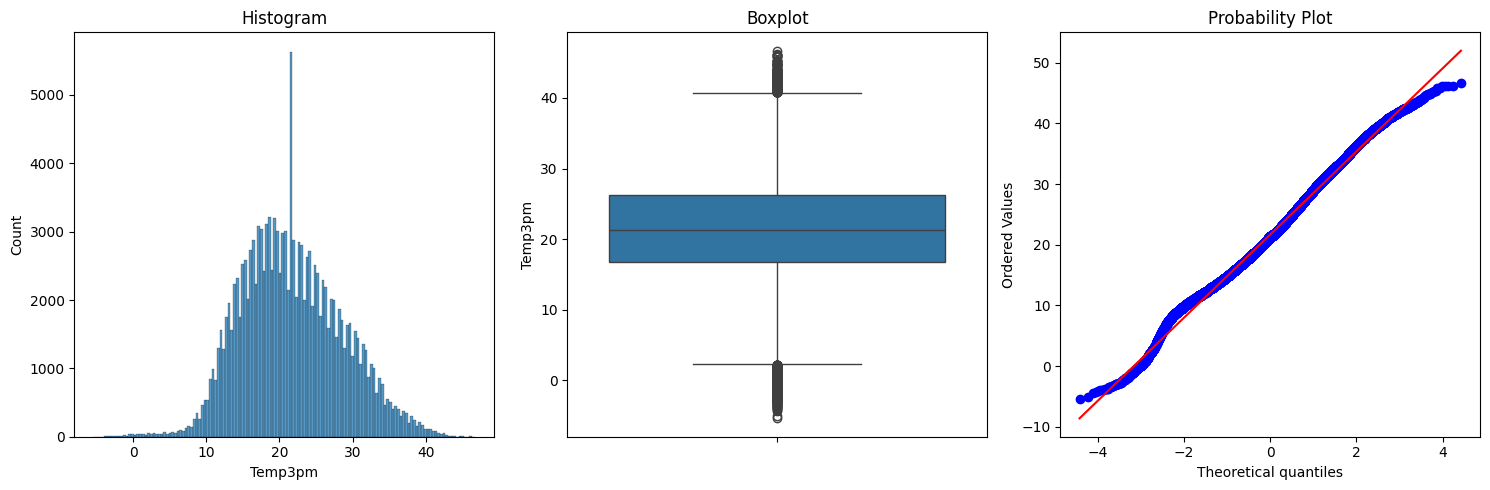

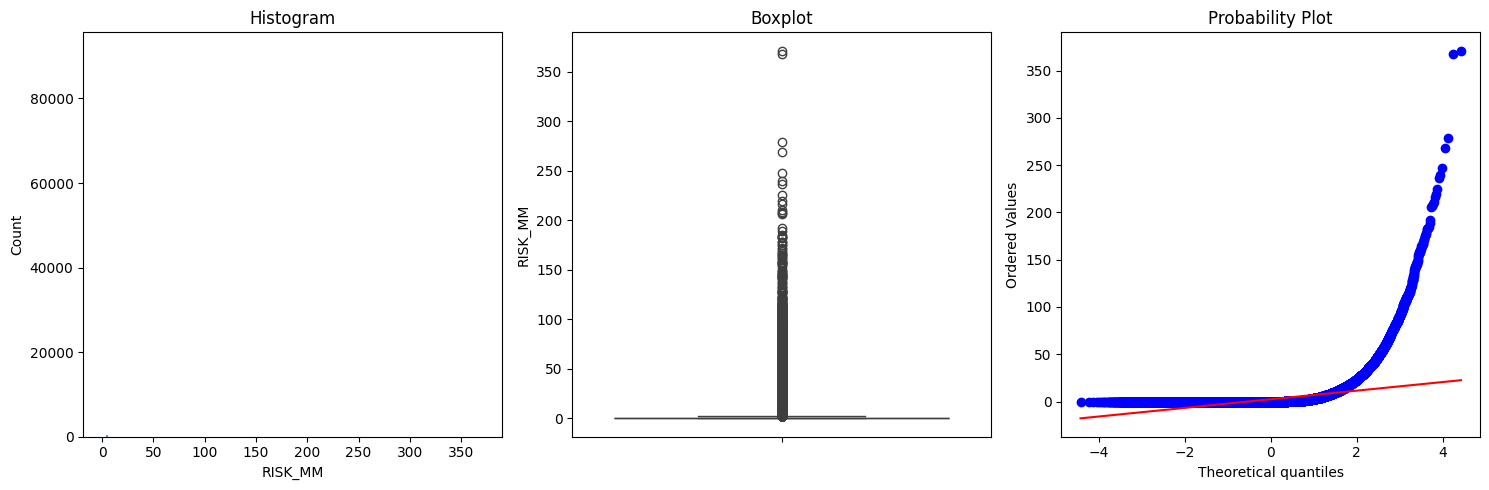

In [15]:
for num_col in num_data:
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    sns.histplot(df1[num_col])
    plt.title('Histogram')
    
    
    plt.subplot(132)
    sns.boxplot(df1[num_col])
    plt.title('Boxplot')
    
    
    plt.subplot(133)
    stats.probplot(df1[num_col], dist='norm', plot=plt)
    plt.title('Probability Plot')
    
    plt.tight_layout()
    plt.show()

In [16]:
outlier_col = ['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm']

In [17]:
for out_col in outlier_col:
    q1 = df1[out_col].quantile(0.25)
    q3 = df1[out_col].quantile(0.75)
    IQR = q3-q1
    min_val = q1 - 1.5 * IQR
    max_val = q3 + 1.5 * IQR
    print(min_val,max_val,out_col)
    df1 = df1[(df1[out_col] >= min_val) & (df1[out_col] <= max_val)]

-1.2000000000000002 2.0 Rainfall
8.5 68.5 WindGustSpeed
-11.0 37.0 WindSpeed9am
-0.5 35.5 WindSpeed3pm


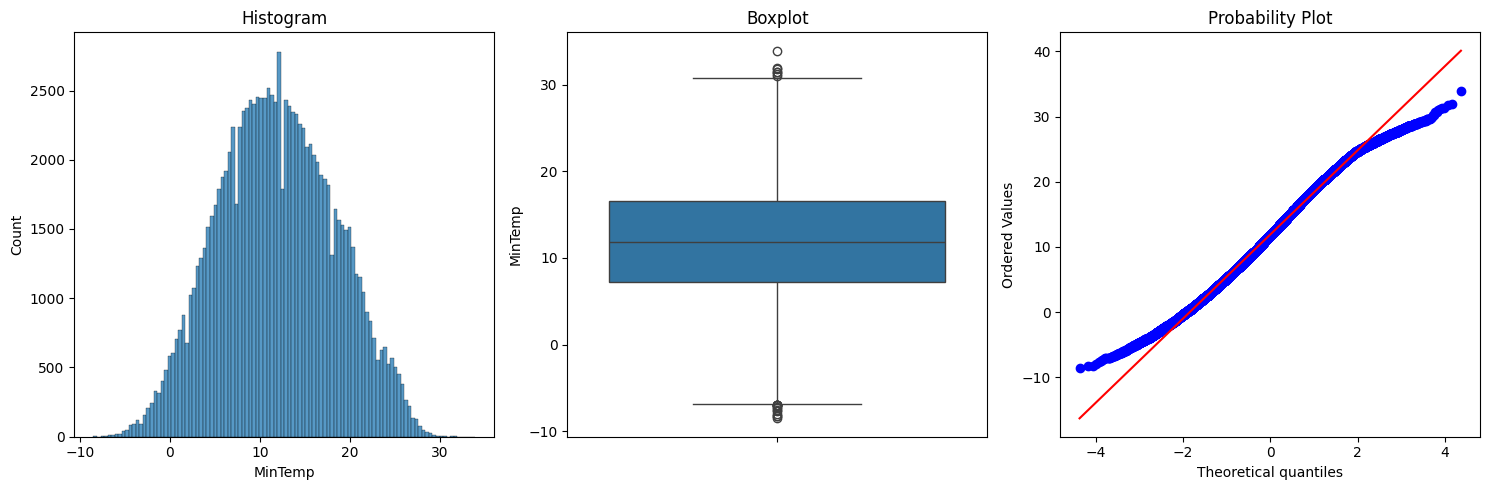

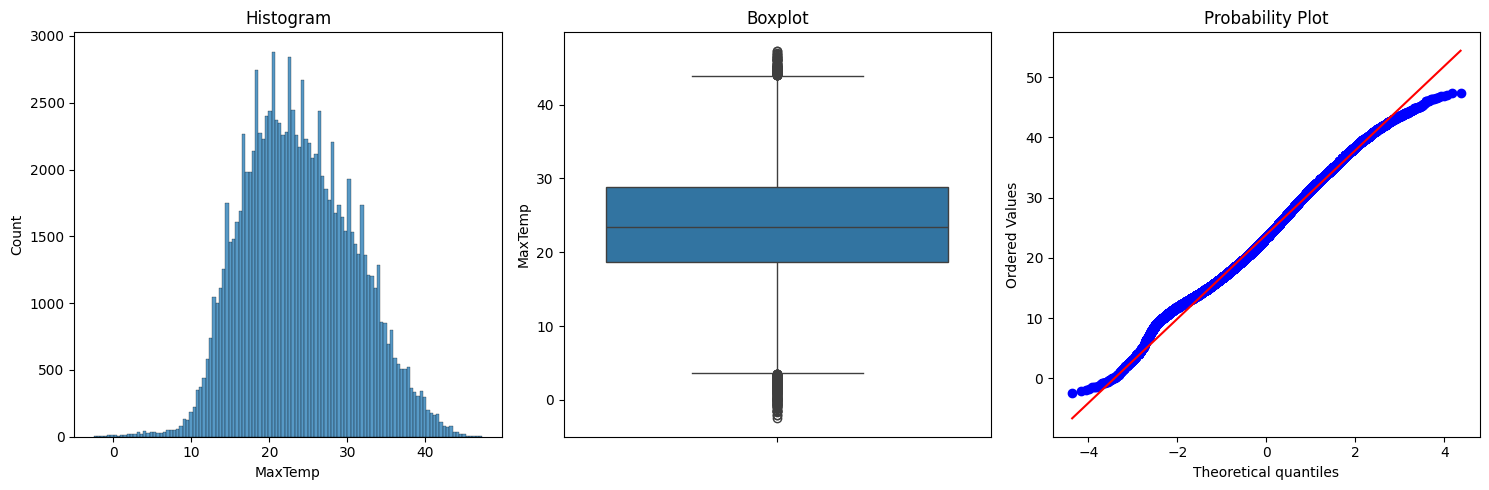

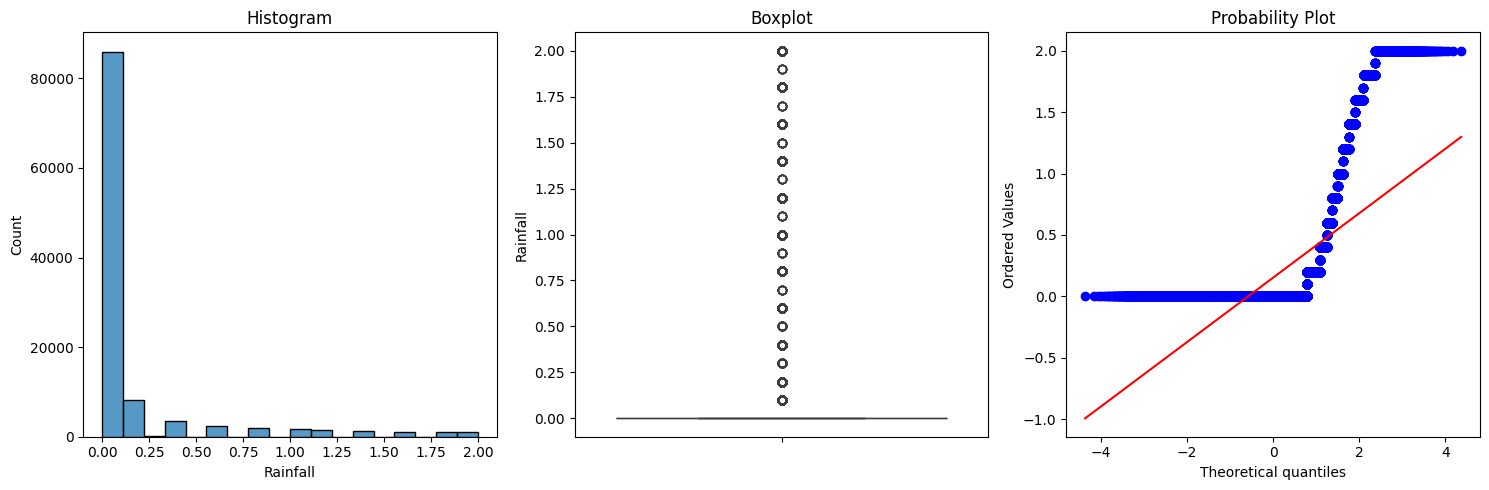

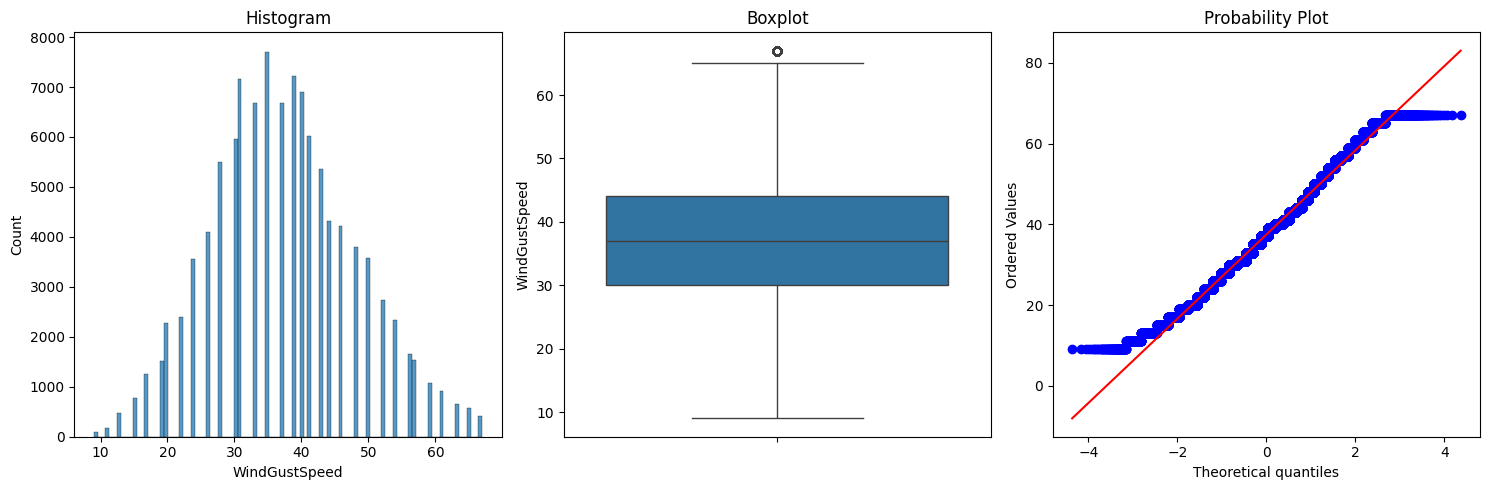

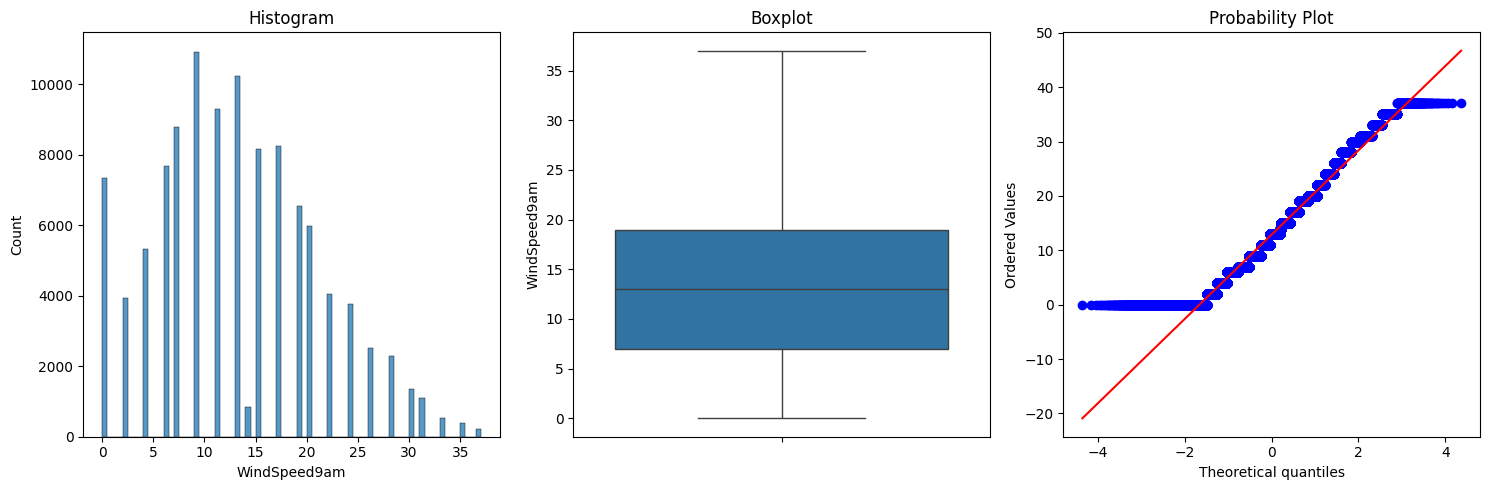

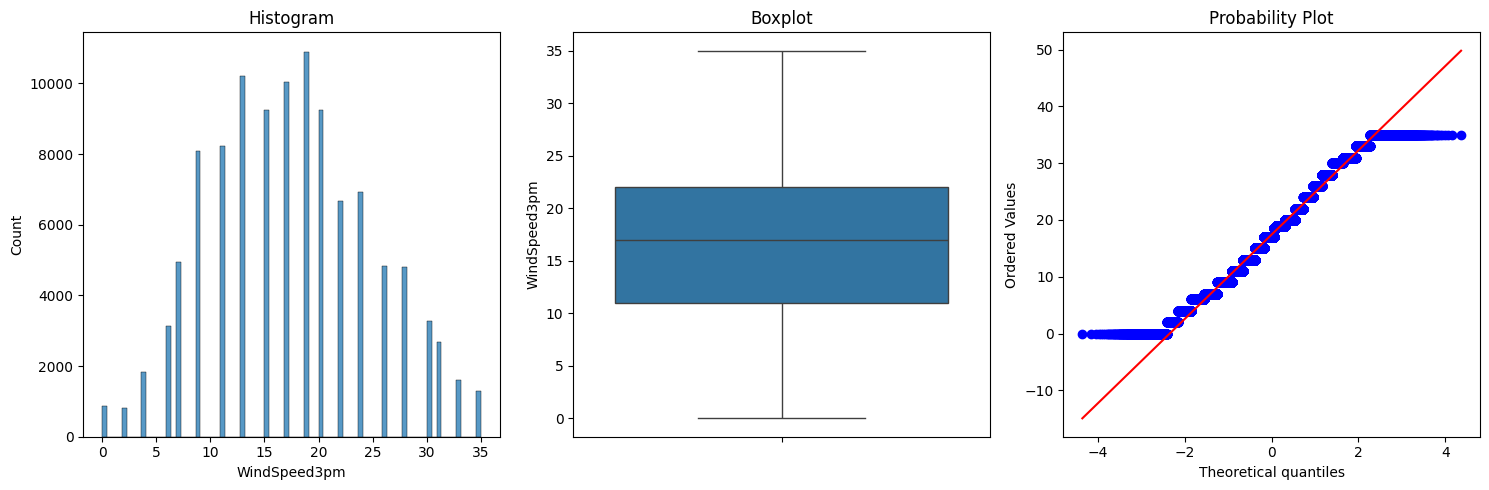

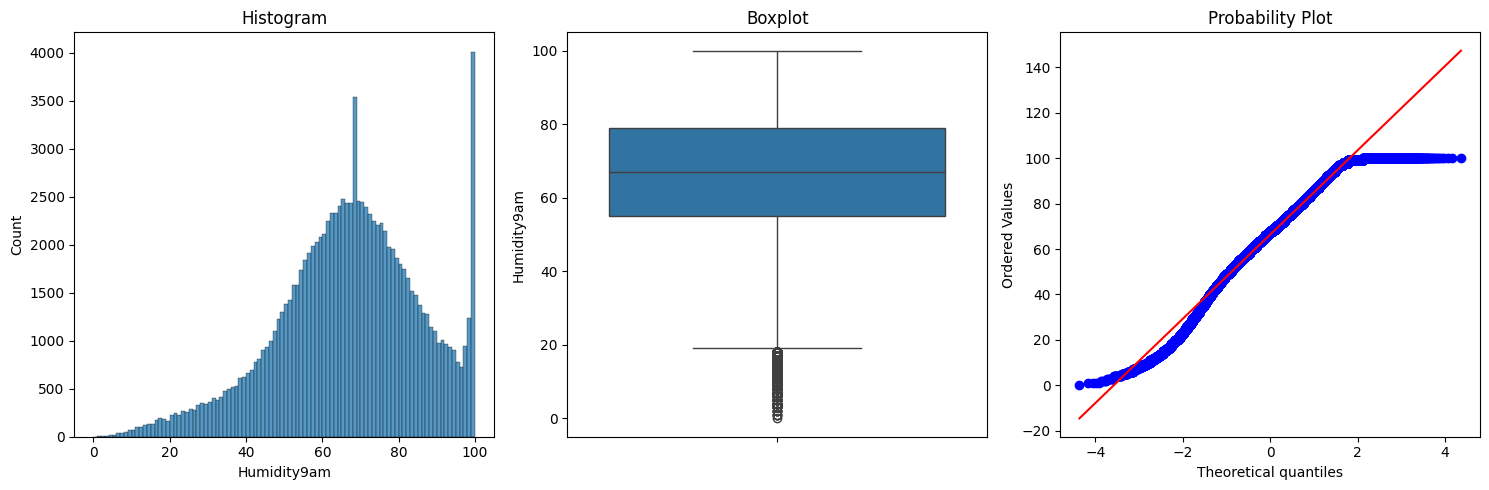

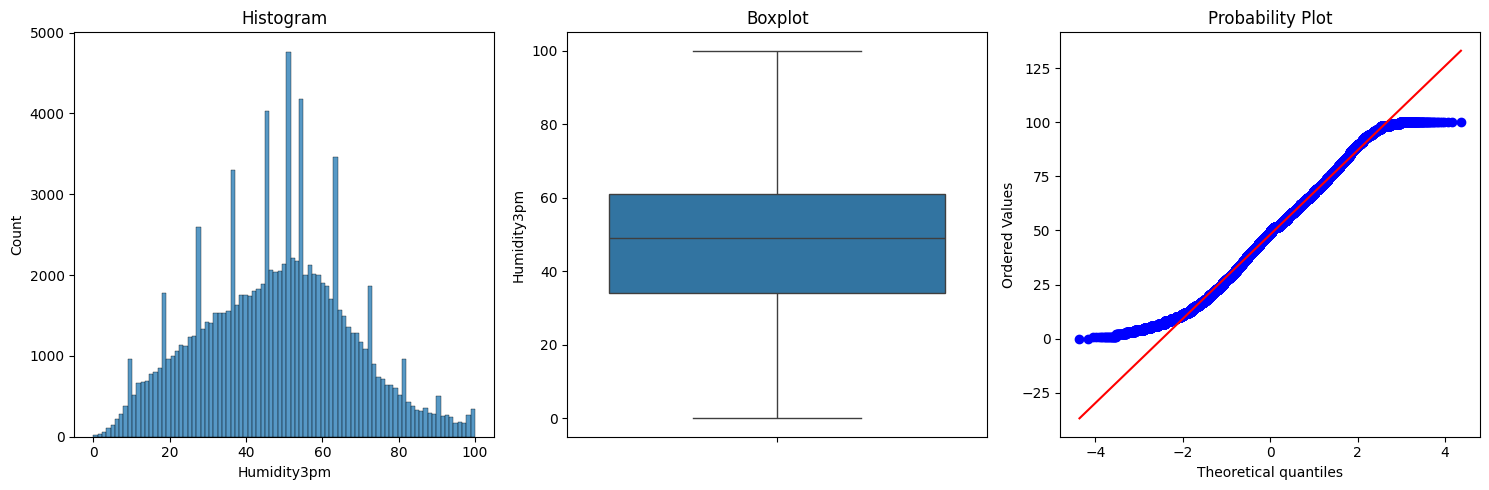

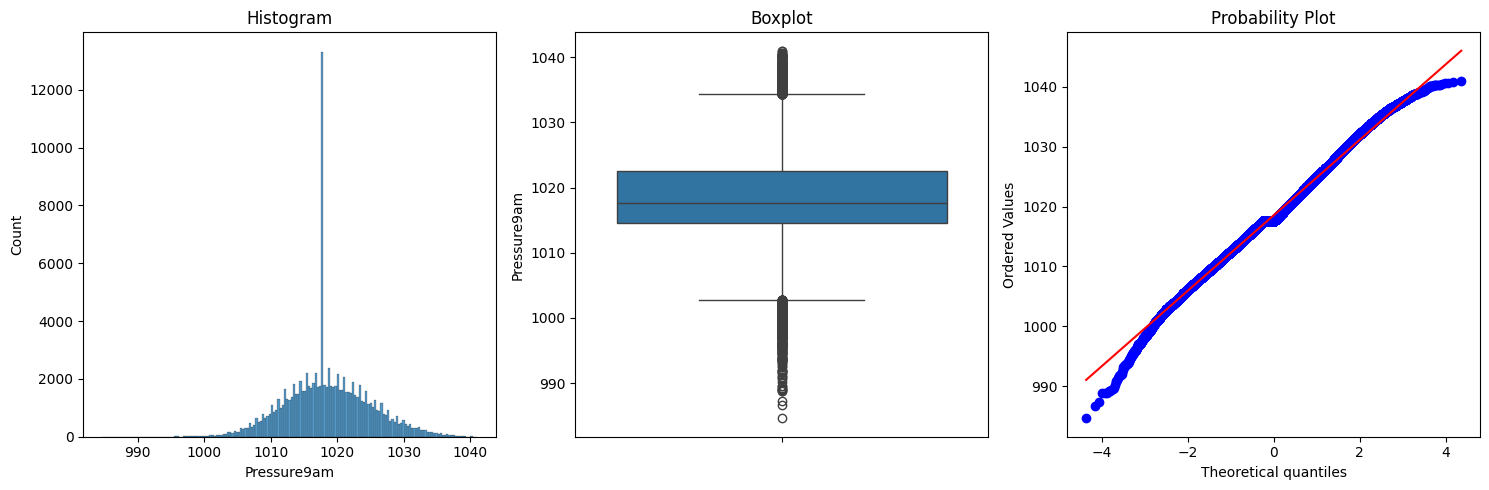

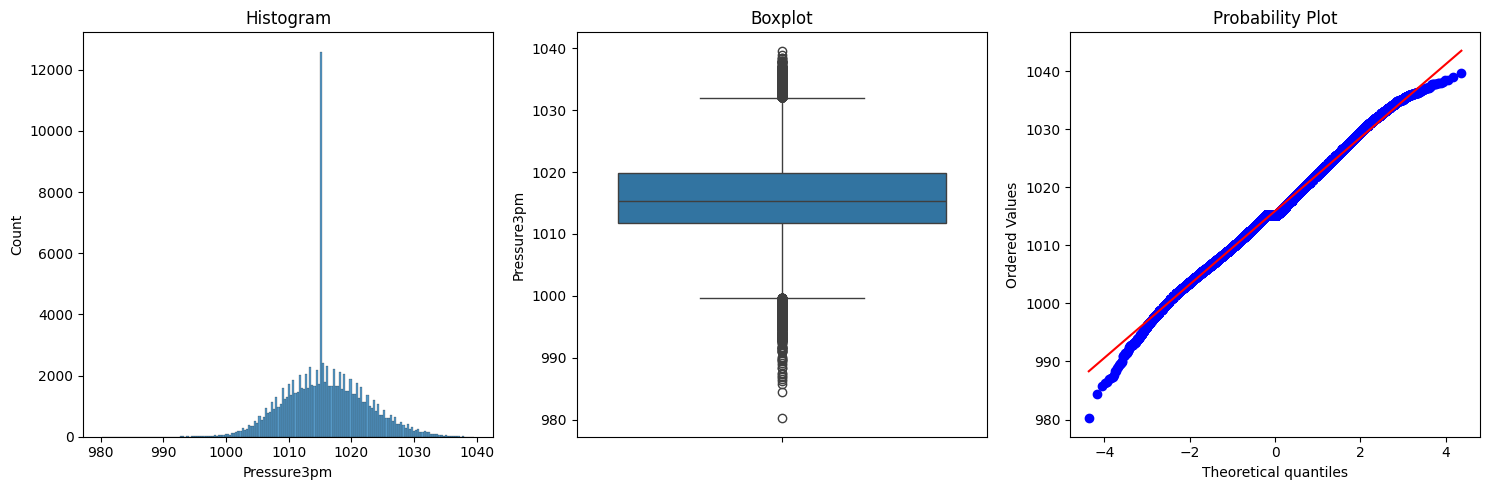

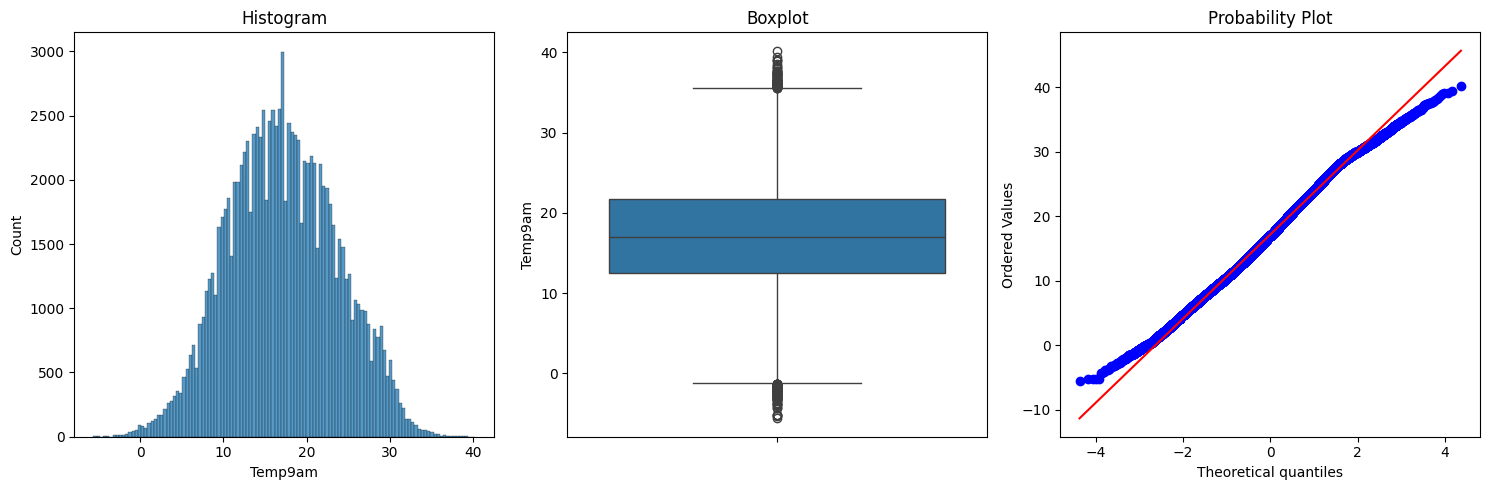

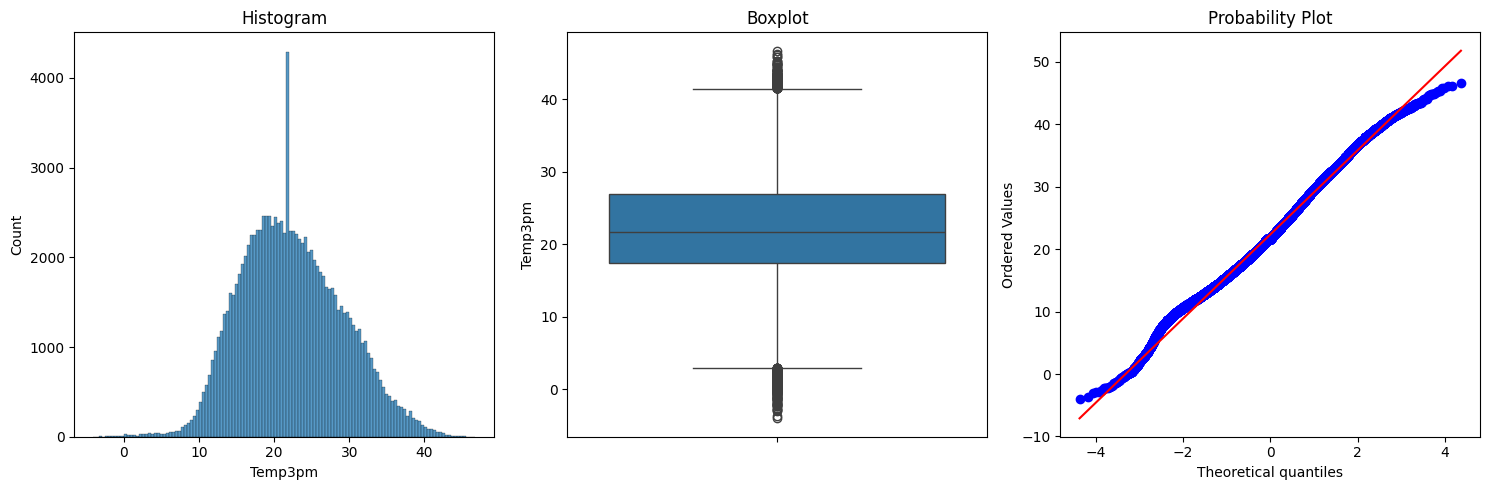

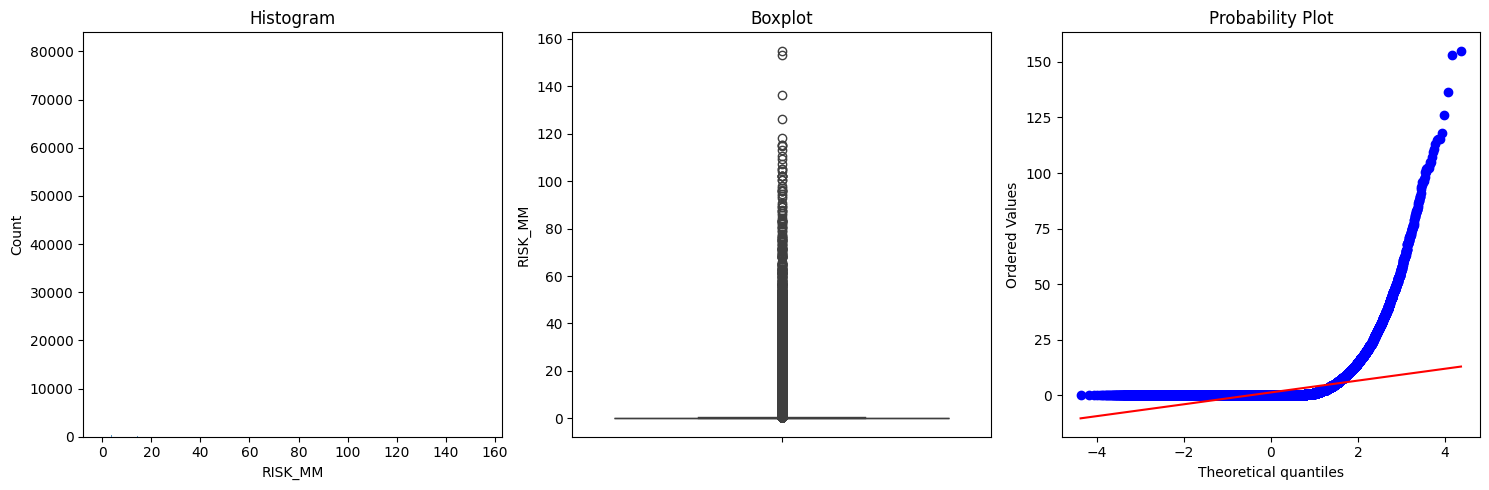

In [18]:
for num_col in num_data:
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    sns.histplot(df1[num_col])
    plt.title('Histogram')
    
    
    plt.subplot(132)
    sns.boxplot(df1[num_col])
    plt.title('Boxplot')
    
    
    plt.subplot(133)
    stats.probplot(df1[num_col], dist='norm', plot=plt)
    plt.title('Probability Plot')
    
    plt.tight_layout()
    plt.show()

In [19]:
df1.shape

(109577, 17)

In [20]:
df2 = df1.copy()

In [21]:
df2.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,No


In [22]:
df2['WindGustDir'].value_counts().head(3)

WindGustDir
W     13590
E      7690
SE     7536
Name: count, dtype: int64

In [23]:
df2['WindDir9am'].value_counts().head(3)

WindDir9am
N     16515
E      7919
SE     7652
Name: count, dtype: int64

In [24]:
df2['WindDir3pm'].value_counts().head(3)

WindDir3pm
SE     11354
S       7091
ESE     7005
Name: count, dtype: int64

In [25]:
df2['RainTomorrow'].value_counts()

RainTomorrow
No     92835
Yes    16742
Name: count, dtype: int64

In [26]:
df2.replace({'No': 0, 'Yes': 1}, inplace=True)
df2.infer_objects(copy=False)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0
142189,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0
142190,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0
142191,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0


In [27]:
df2.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,0


In [28]:
x = df2.drop(columns=['RainTomorrow'])
y = df2['RainTomorrow']

In [29]:
x.head(3)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0


In [30]:
y.value_counts()

RainTomorrow
0    92835
1    16742
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X, Y = oversampler.fit_resample(x, y)

In [32]:
Y.value_counts()

RainTomorrow
0    92835
1    92835
Name: count, dtype: int64

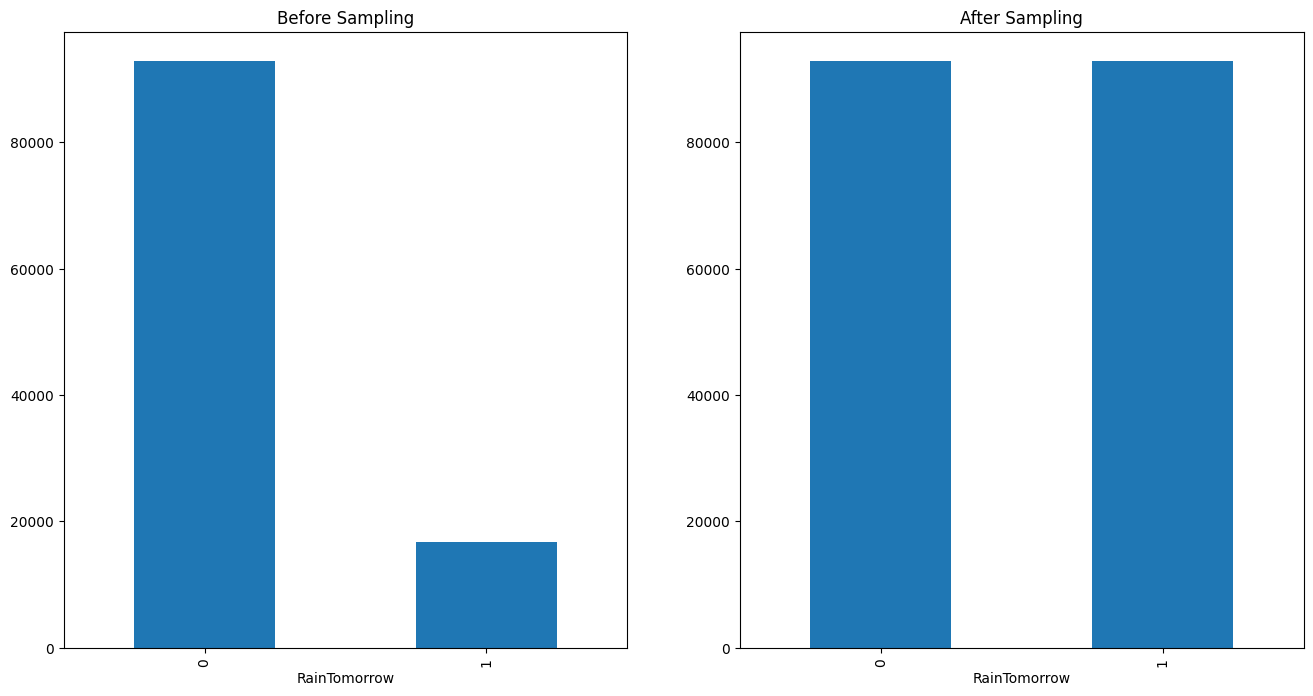

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(121)
y.value_counts().plot(kind='bar')
plt.title("Before Sampling")
plt.subplot(122)
Y.value_counts().plot(kind='bar')
plt.title("After Sampling")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(148536, 16)
(37134, 16)
(148536,)
(37134,)


In [36]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [37]:
trf1 = ColumnTransformer(transformers=[
    ('OneHot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[3,5,6])
],remainder='passthrough')

In [38]:
trf2 = StandardScaler()

In [39]:
trf3 = LogisticRegression()

In [40]:
pipe = make_pipeline(trf1,trf2,trf3)

In [41]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 5, 6])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [42]:
pipe.score(x_train,y_train)

0.995320999622987

In [43]:
pipe.score(x_test,y_test)

0.9956104917326439

In [44]:
y_pred = pipe.predict(x_test)

In [45]:
a_s = accuracy_score(y_test,y_pred)
print('accuracy_score:-',a_s)
print('<-------------------------------------->')
p_s = precision_score(y_test,y_pred)
print('precision_score:-',p_s)
print('<-------------------------------------->')
c_m = confusion_matrix(y_test,y_pred)
print('confusion_matrix:-\n',c_m)
print('<-------------------------------------->')
c_r = classification_report(y_test,y_pred)
print('classification_report:-\n',c_r)

accuracy_score:- 0.9956104917326439
<-------------------------------------->
precision_score:- 0.9913029559278626
<-------------------------------------->
confusion_matrix:-
 [[18392   163]
 [    0 18579]]
<-------------------------------------->
classification_report:-
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18555
           1       0.99      1.00      1.00     18579

    accuracy                           1.00     37134
   macro avg       1.00      1.00      1.00     37134
weighted avg       1.00      1.00      1.00     37134



In [46]:
x_train.iloc[556].values

array([0.7, 16.2, 0.0, 'N', 24.0, 'W', 'NNW', 4.0, 15.0, 68.0, 29.0,
       1027.4, 1024.6, 8.7, 15.4, 0.0], dtype=object)

In [47]:
y_train.iloc[455]

1

In [48]:
new = (12.186399728729265, 27.8, 0.0, 'W', 39.98429165757619, 'N', 'SE',
       14.001988000994, 18.63757586179718, 68.8438103105705,
       51.482606091656265, 1017.6537584159653, 1015.2582035378904,
       16.987508581701338, 21.687234973147767, 1.6)

In [49]:
new_data = np.asarray(new).reshape(1,-1)

In [50]:
prediciton = pipe.predict(new_data)
print(prediciton)

[1]


In [51]:
if prediciton[0] == 0:
    print('No Rain Tommarrow')
else:
    print('Yes Rain Tommarrow')

Yes Rain Tommarrow


In [52]:
import pickle

In [53]:
with open('clean_data.pkl', 'wb') as f:
    pickle.dump(X, f)

In [54]:
with open('model.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [61]:
df.iloc[0].values

array([13.4, 22.9, 0.6, 'W', 44.0, 'W', 'WNW', 20.0, 24.0, 71.0, 22.0,
       1007.7, 1007.1, 16.9, 21.8, 0.0, 'No'], dtype=object)

In [62]:
data = (13.4, 22.9, 0.6, 'W', 44.0, 'W', 'WNW', 20.0, 24.0, 71.0, 22.0,
       1007.7, 1007.1, 16.9, 21.8, 0.0, )

In [63]:
new_data = np.asarray(data).reshape(1,-1)
prediciton = pipe.predict(new_data)
print(prediciton)

[0]


In [64]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,No
